In [ ]:
# https://keras.io/examples/vision/mnist_convnet/

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 37s 85ms/step - loss: 0.7356 - accuracy: 0.7706 - val_loss: 0.0898 - val_accuracy: 0.9752
Epoch 2/15
422/422 [==============================] - 36s 86ms/step - loss: 0.1321 - accuracy: 0.9598 - val_loss: 0.0555 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 36s 86ms/step - loss: 0.0884 - accuracy: 0.9728 - val_loss: 0.0493 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 36s 86ms/step - loss: 0.0747 - accuracy: 0.9766 - val_loss: 0.0424 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 36s 85ms/step - loss: 0.0666 - accuracy: 0.9789 - val_loss: 0.0385 - val_accuracy: 0.9903
Epoch 6/15
422/422 [==============================] - 36s 86ms/step - loss: 0.0573 - accuracy: 0.9828 - val_loss: 0.0359 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 36s 85ms/step - loss: 0.0542 - accuracy: 0.9822 - val_loss: 0.0337 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02539951540529728
Test accuracy: 0.9905999898910522


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000, 10)


In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


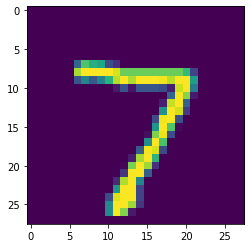

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0,...,0])

In [ ]:
output = model.predict(x_test)

In [ ]:
print(output.shape)

(10000, 10)


In [ ]:
!git clone https://gist.github.com/8409b3feec20f159d8a50b0a811d3bca.git

Cloning into '8409b3feec20f159d8a50b0a811d3bca'...
remote: Enumerating objects: 6, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 6
Unpacking objects: 100% (6/6), done.


In [ ]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=280, h=280, line_width=15):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [ ]:
draw()

3960

In [ ]:
import imageio
input = imageio.imread("drawing.png")

In [ ]:
import tensorflow as tf
input = tf.image.resize(input, [28,28], method='bilinear').numpy()

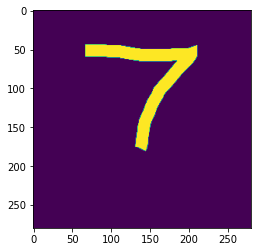

In [ ]:
plt.imshow(input[...,3])

In [ ]:
y_train[0].max(),y_train[0].min()

(1.0, 0.0)

In [ ]:
input.max()

255

In [ ]:
input = input.astype(float)/255

In [ ]:
input.max(), input.min()

(1.0, 0.0)

TypeError: ignored

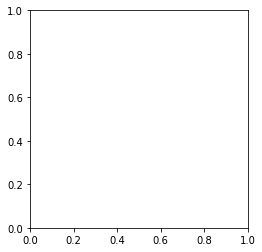

In [ ]:
plt.imshow(input[::10,::10,3])

In [ ]:
input.shape

(280, 280, 4)

In [ ]:
 input = np.reshape(input[::10,::10,3], (1, 28, 28, 1))

In [ ]:
test = model.predict(input)

In [ ]:
test.shape

(1, 10)

<BarContainer object of 10 artists>

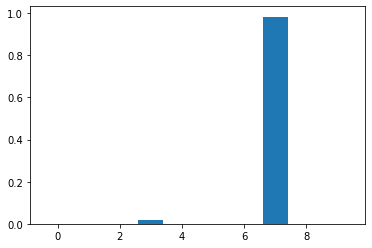

In [ ]:
plt.bar(x=np.arange(test.size),height=test[0])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [ ]:
model.layers[0].weights[0].shape

TensorShape([3, 3, 1, 32])

In [ ]:
model.layers[2].weights[0].shape

TensorShape([3, 3, 32, 64])

In [ ]:
model.layers[0].weights[0].shape[3]

32

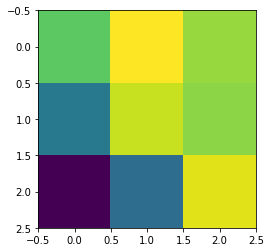

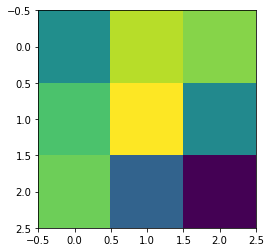

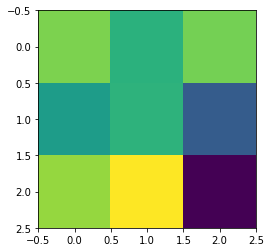

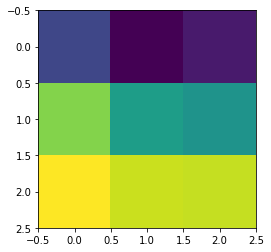

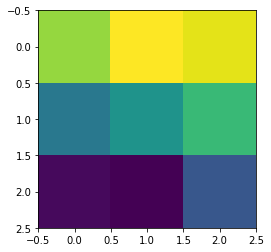

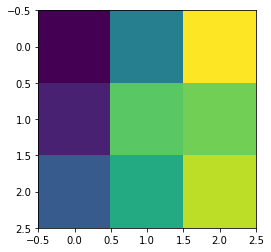

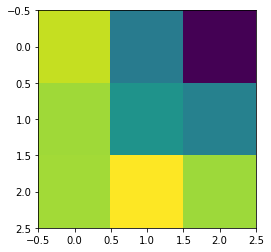

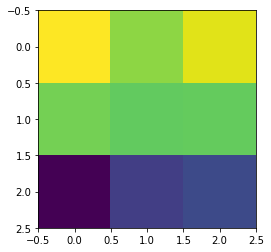

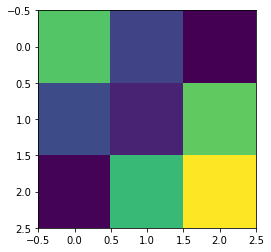

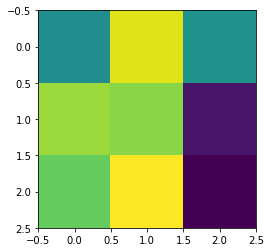

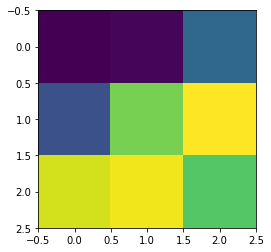

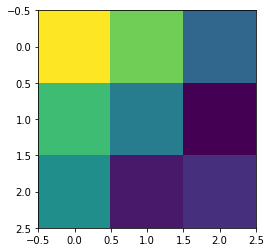

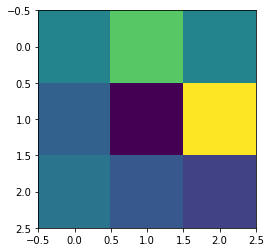

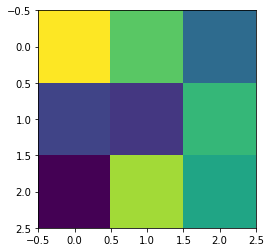

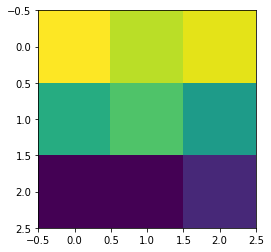

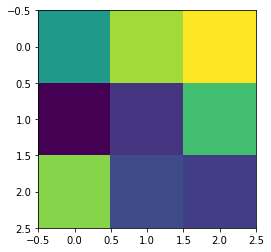

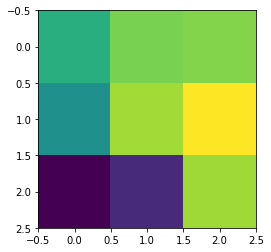

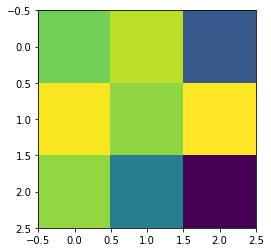

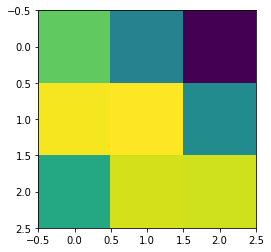

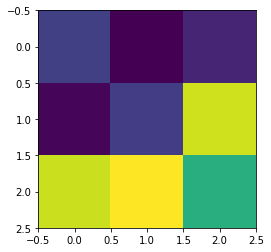

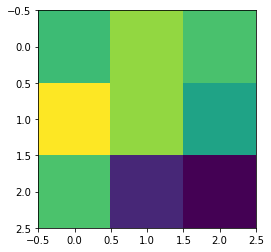

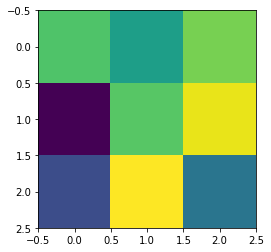

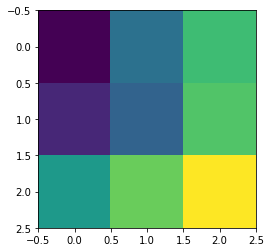

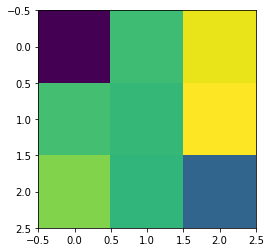

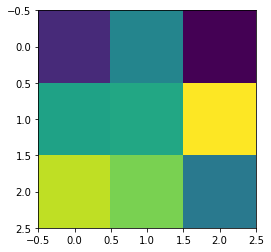

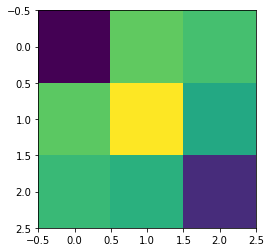

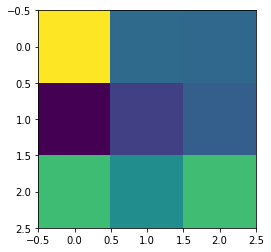

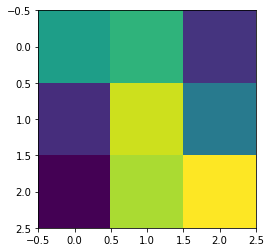

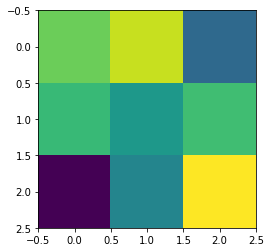

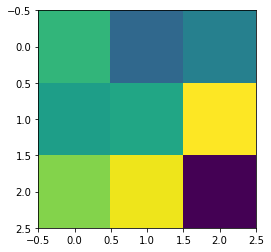

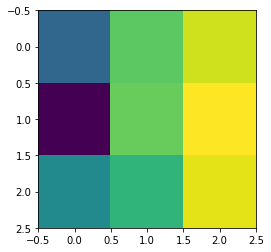

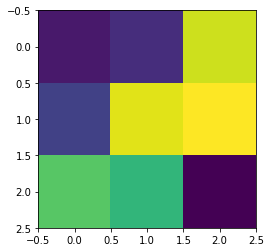

In [ ]:
for i in range(model.layers[0].weights[0].shape[3]):
  plt.ion()
  # print(i)
  chip = model.layers[0].weights[0][...,0,i]
  # print(chip)
  plt.imshow(chip)
  plt.show()